<a href="https://colab.research.google.com/github/rekhavidya/EVA1/blob/master/Top4_anchor_boxes_using_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import necessary Modules

In [0]:
import json 
import os
with open('./via_project_EVA-Assgn19.json') as f:
  j_f=json.load(f)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np




###Parse the json file

In [0]:
img_meta=j_f['_via_img_metadata']

In [0]:
images=[]
for img in img_meta:
  images.append(img_meta[img])

###Obtain the width and height of every region and append them to 'boxes' list

In [0]:

boxes=[]

for img in images:
  for region in img['regions']:
    
    boxes.append([region['shape_attributes']['width'],region['shape_attributes']['height']])

###Convert boxes list to numpy array

In [0]:

boxes=np.array(boxes)

###Plot the bounding box sizes as a scatter plot to visualize the distribution

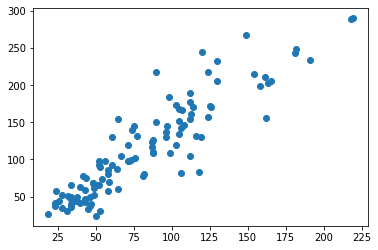

In [9]:
plt.scatter(boxes[:,0],boxes[:,1])
plt.show()

###Run KMeans clustering on the boxes array with number of clusters set to 4. 
###Visualize the 4 clusters 

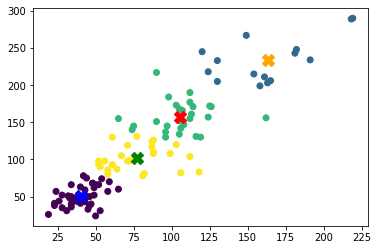

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,random_state=2).fit(boxes)
cl_centers=km.cluster_centers_

plt.scatter(boxes[:,0], boxes[:,1], c=km.labels_.astype(float))
plt.scatter(cl_centers[0,0],cl_centers[0,1],s=150,c='b', marker='X')

plt.scatter(cl_centers[1,0],cl_centers[1,1],s=150,c='orange', marker='X')

plt.scatter(cl_centers[2,0],cl_centers[2,1],s=150,c='r', marker='X')

plt.scatter(cl_centers[3,0],cl_centers[3,1],s=150,c='g', marker='X')

plt.show()

###Get the anchor box sizes from the centroids of the 4 clusters 

In [13]:
anchor_boxes=[]
for w,h in cl_centers:
  anchor_boxes.append([int(w),int(h)])

for i in range(len(anchor_boxes)):
  print('anchor box',i+1,': width = ',anchor_boxes[i][0], ' height = ',anchor_boxes[i][1])

anchor box 1 : width =  40  height =  50
anchor box 2 : width =  163  height =  233
anchor box 3 : width =  105  height =  157
anchor box 4 : width =  77  height =  101


##Summary
Using KMeans clustring we obtained the below 4 anchor boxes for the face dataset

anchor box 1 : width =  40  height =  50
anchor box 2 : width =  163  height =  233
anchor box 3 : width =  105  height =  157
anchor box 4 : width =  77  height =  101 